EDA 1

In [ ]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

file_name = list(uploaded.keys())[0]  # Get the uploaded file name
bike_data = pd.read_csv(file_name)

bike_data.head()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Answer to Q. No1:

In [ ]:
min_price = bike_data['selling_price'].min()
max_price = bike_data['selling_price'].max()

print(f"The range of selling prices in the dataset is from ₹{min_price} to ₹{max_price}.")


The range of selling prices in the dataset is from ₹5000 to ₹760000.


Answer to Q.No 2:

In [ ]:
median_price = bike_data['selling_price'].median()

print(f"The median selling price for bikes in the dataset is ₹{median_price}.")


The median selling price for bikes in the dataset is ₹45000.0.


Answer to Q.No 3:

In [ ]:
most_common_seller = bike_data['seller_type'].mode()[0]

print(f"The most common seller type in the dataset is: {most_common_seller}.")


The most common seller type in the dataset is: Individual.


Answer to Q.No 4:

In [ ]:
bikes_above_50k = bike_data[bike_data['km_driven'] > 50000].shape[0]

print(f"The number of bikes that have driven more than 50,000 kilometers is: {bikes_above_50k}.")


The number of bikes that have driven more than 50,000 kilometers is: 170.


Answer to Q.No 5:

In [ ]:
unique_models = bike_data['name'].nunique()
print(f"The dataset contains {unique_models} unique bike models.")


The dataset contains 279 unique bike models.


Answer to Q.No 6:

In [ ]:
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
total_bikes = bike_data.shape[0]
proportion_2015_or_older = (bikes_2015_or_older / total_bikes) * 100
print(f"The proportion of bikes from the year 2015 or older is {proportion_2015_or_older:.2f}%.")


The proportion of bikes from the year 2015 or older is 56.64%.


Answer to Q.No 7:

In [ ]:
missing_values = bike_data.isnull().sum()
missing_percentage = (missing_values / bike_data.shape[0]) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Trend of missing values across the dataset:")
print(missing_info)


Trend of missing values across the dataset:
                   Missing Values  Percentage
name                            0    0.000000
selling_price                   0    0.000000
year                            0    0.000000
seller_type                     0    0.000000
owner                           0    0.000000
km_driven                       0    0.000000
ex_showroom_price             435   40.999057


Answer to Q.No 8:

In [ ]:
highest_price = bike_data['ex_showroom_price'].max()
bike_with_highest_price = bike_data[bike_data['ex_showroom_price'] == highest_price]

print(f"The highest ex_showroom_price is ₹{highest_price}.")
print("The bike(s) with the highest ex_showroom_price:")
print(bike_with_highest_price[['name', 'ex_showroom_price']])


The highest ex_showroom_price is ₹1278000.0.
The bike(s) with the highest ex_showroom_price:
                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


Answer to Q.No 9:

In [ ]:
bikes_by_seller_type = bike_data['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:")
print(bikes_by_seller_type)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Answer to Q.No 10:

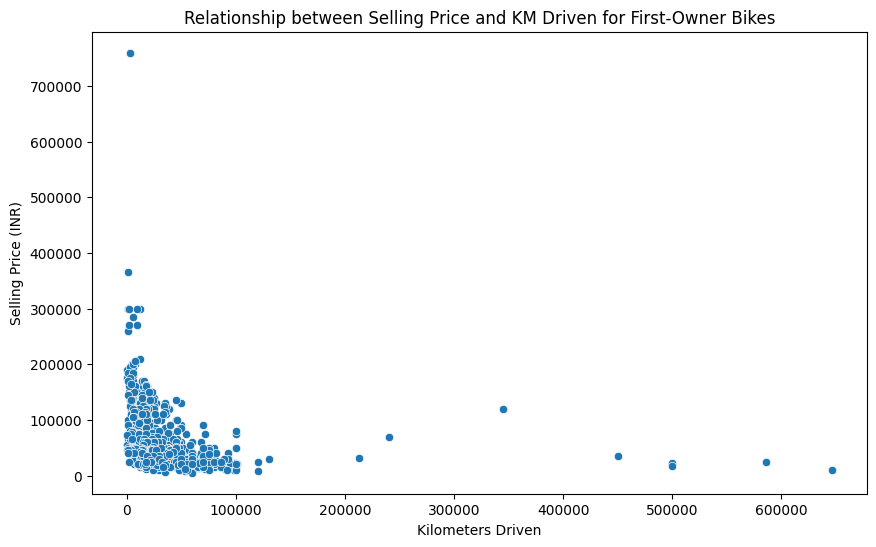

Correlation between selling_price and km_driven for first-owner bikes: -0.24


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.show()

correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"Correlation between selling_price and km_driven for first-owner bikes: {correlation:.2f}")


Answer to Q.No 11:

In [ ]:

Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bike_data_no_outliers = bike_data[(bike_data['km_driven'] >= lower_bound) & (bike_data['km_driven'] <= upper_bound)]
print(f"Original dataset size: {bike_data.shape[0]}")
print(f"Dataset size after removing outliers: {bike_data_no_outliers.shape[0]}")


Original dataset size: 1061
Dataset size after removing outliers: 1022


Answer to Q.No 12:

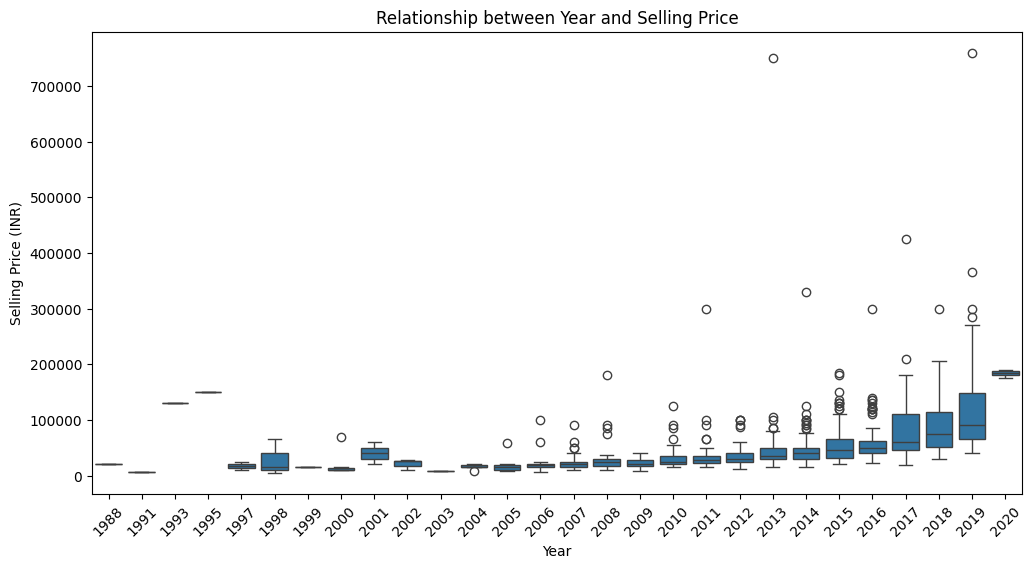

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_data, x='year', y='selling_price')
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=45)
plt.show()


Answer to Q.No 13:

In [ ]:
import datetime


current_year = datetime.datetime.now().year
bike_data['age'] = current_year - bike_data['year']

average_depreciation = bike_data.groupby('age')['selling_price'].mean()

print("Average selling price based on bike's age:")
print(average_depreciation)


Average selling price based on bike's age:
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


Answer to Q.No 14:

In [ ]:
avg_price_by_year = bike_data.groupby('year')['selling_price'].mean()

bike_data['avg_price_by_year'] = bike_data['year'].map(avg_price_by_year)

bike_data['significantly_above_avg'] = bike_data['selling_price'] > (1.5 * bike_data['avg_price_by_year'])

bikes_above_avg = bike_data[bike_data['significantly_above_avg']]

print("Bikes priced significantly above the average price for their manufacturing year:")
print(bikes_above_avg[['name', 'year', 'selling_price', 'avg_price_by_year']])


Bikes priced significantly above the average price for their manufacturing year:
                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_price_by_year  
2         87660.374046  
7         34289.285714  
13       119689.511628  
18        87660.374046  
2

Answer to Q.No 15:

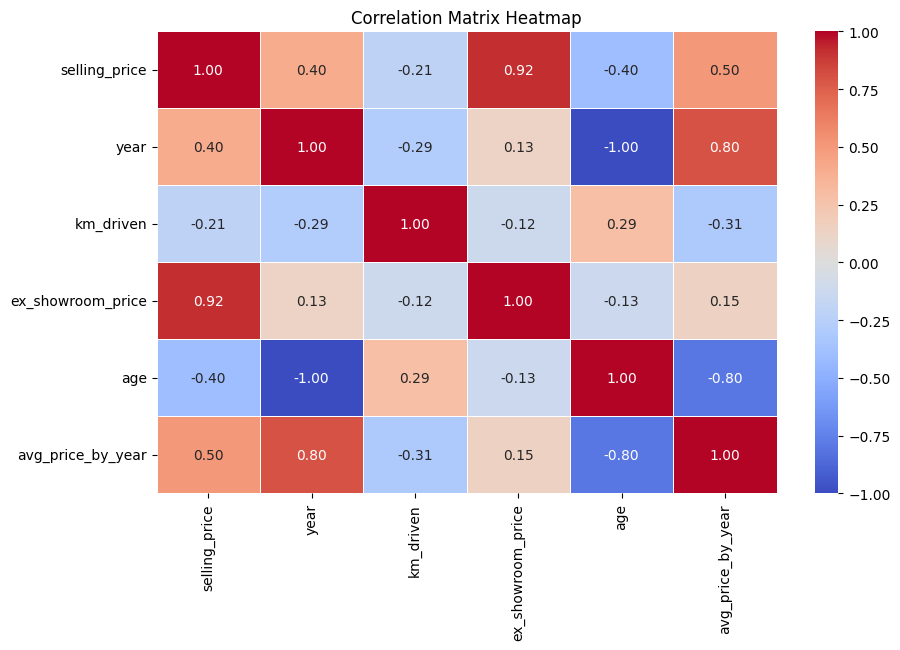

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = bike_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


EDA 2


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
file_name = list(uploaded.keys())[0]
car_data = pd.read_csv(file_name)
car_data.head()


Saving Car Sale.csv to Car Sale.csv


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Answer to Q.No 1:

Average selling price of cars for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                           

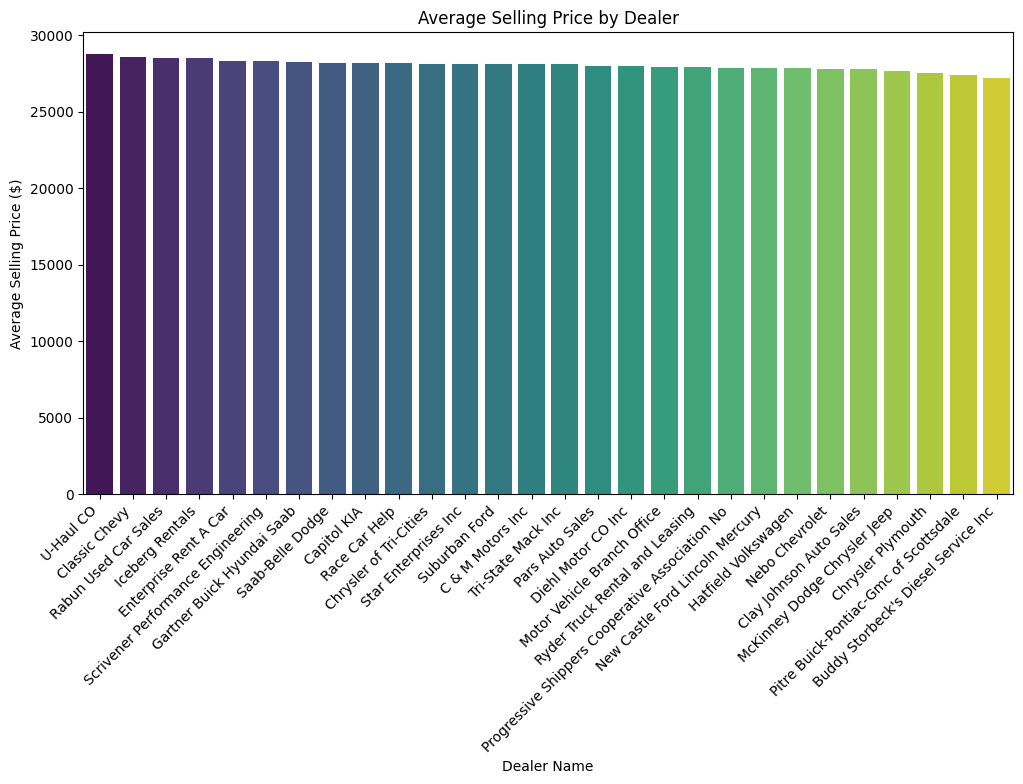

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_dealer = car_data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print("Average selling price of cars for each dealer:")
print(avg_price_by_dealer)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_dealer.index, y=avg_price_by_dealer.values, palette="viridis")
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Answer to Q.No 2:

The company with the highest price variation is Lincoln with a standard deviation of $19658.05.

Price variation (standard deviation) for each company:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float6

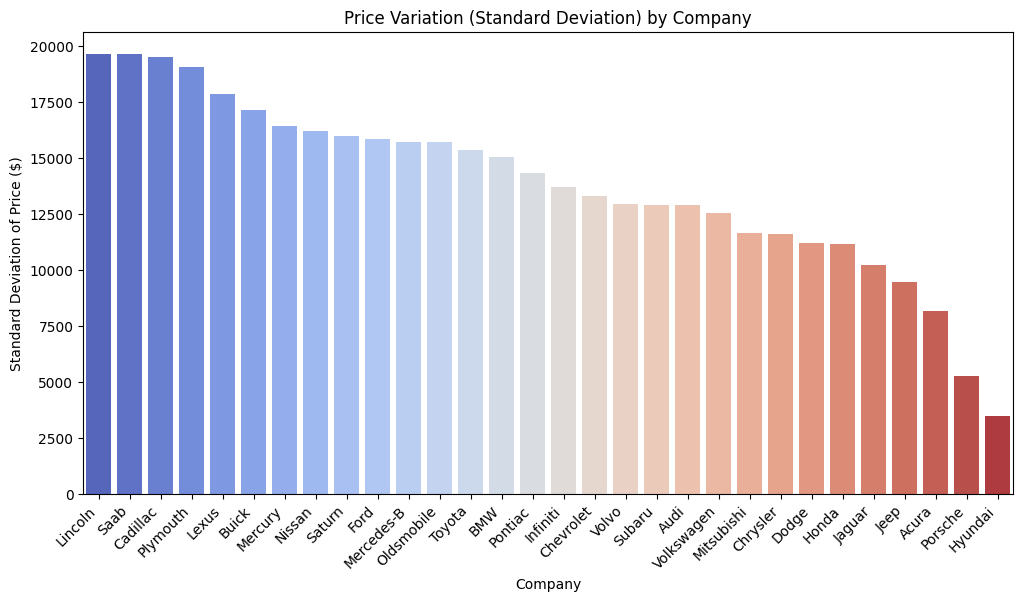

In [ ]:
price_variation_by_company = car_data.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

highest_variation_company = price_variation_by_company.idxmax()
highest_variation_value = price_variation_by_company.max()

print(f"The company with the highest price variation is {highest_variation_company} with a standard deviation of ${highest_variation_value:.2f}.")
print("\nPrice variation (standard deviation) for each company:")
print(price_variation_by_company)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=price_variation_by_company.index, y=price_variation_by_company.values, palette="coolwarm")
plt.title('Price Variation (Standard Deviation) by Company')
plt.xlabel('Company')
plt.ylabel('Standard Deviation of Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Answer to Q.No 3:

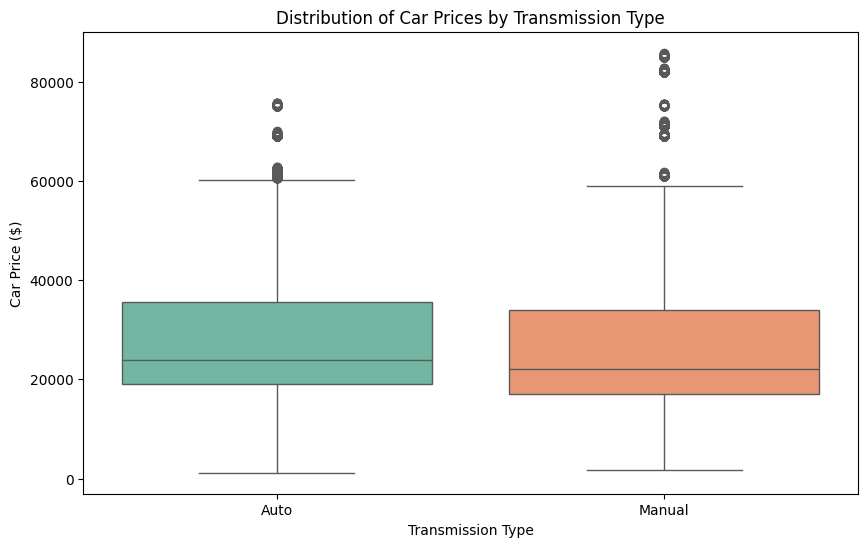

Interquartile Range (IQR) for each transmission type:
                   Q1       Q3      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=car_data, x='Transmission', y='Price ($)', palette='Set2')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Car Price ($)')
plt.show()

iqr_by_transmission = car_data.groupby('Transmission')['Price ($)'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25)
)

print("Interquartile Range (IQR) for each transmission type:")
print(iqr_by_transmission)


Answer to Q.No 4:

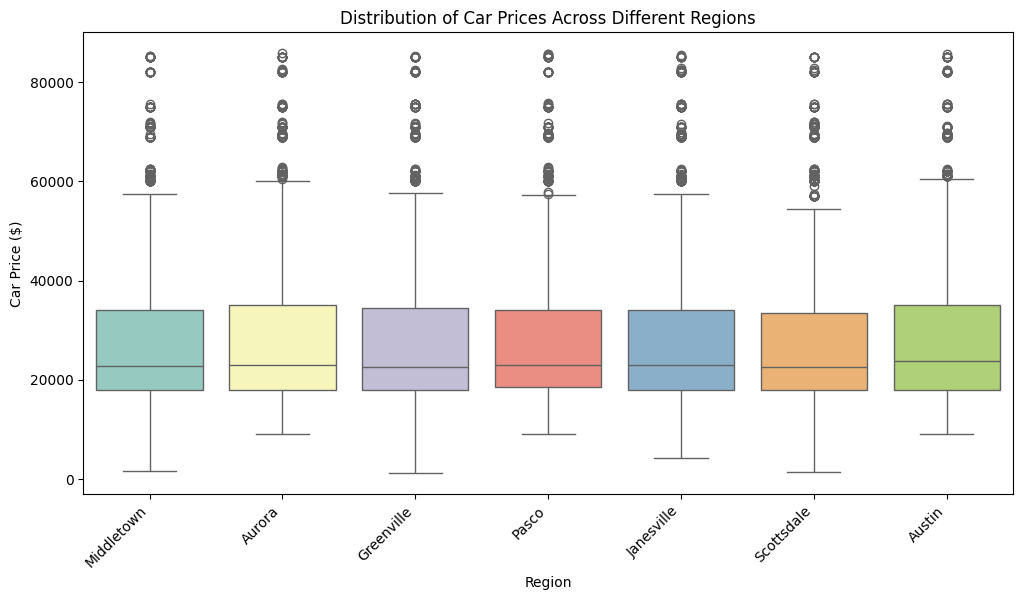

Car Price Statistics by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          340

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=car_data, x='Dealer_Region', y='Price ($)', palette='Set3')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

price_stats_by_region = car_data.groupby('Dealer_Region')['Price ($)'].describe()

print("Car Price Statistics by Region:")
print(price_stats_by_region)


Answer to Q.No 5:

Distribution of Cars Based on Body Styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


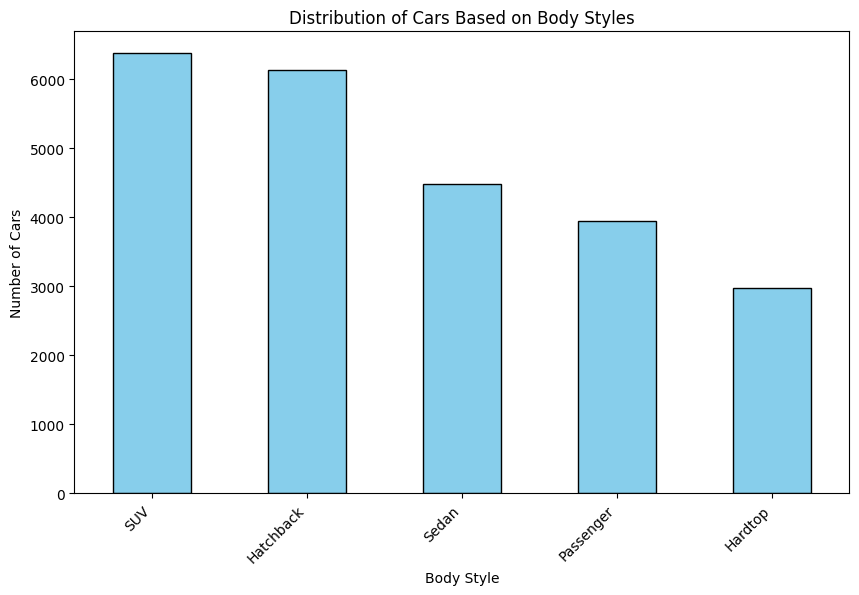

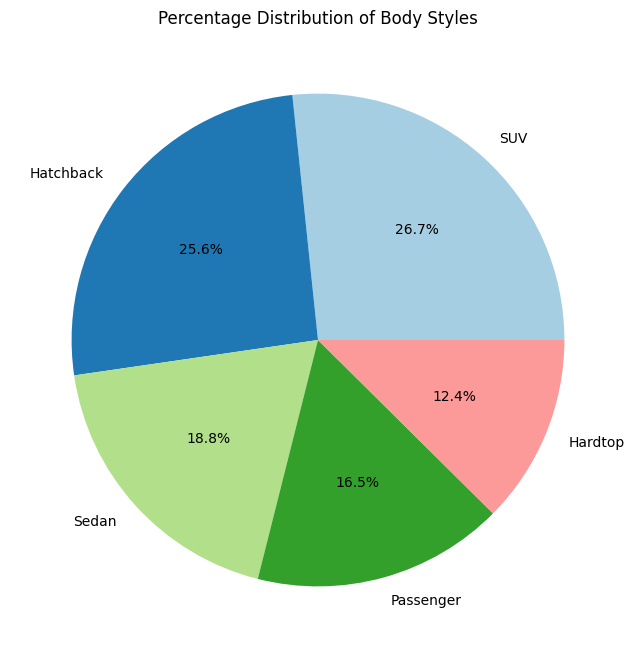

In [ ]:
import matplotlib.pyplot as plt

body_style_distribution = car_data['Body Style'].value_counts()

print("Distribution of Cars Based on Body Styles:")
print(body_style_distribution)

plt.figure(figsize=(10, 6))
body_style_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 8))
body_style_distribution.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Body Styles')
plt.ylabel('')
plt.show()


Answer to Q.No 6:

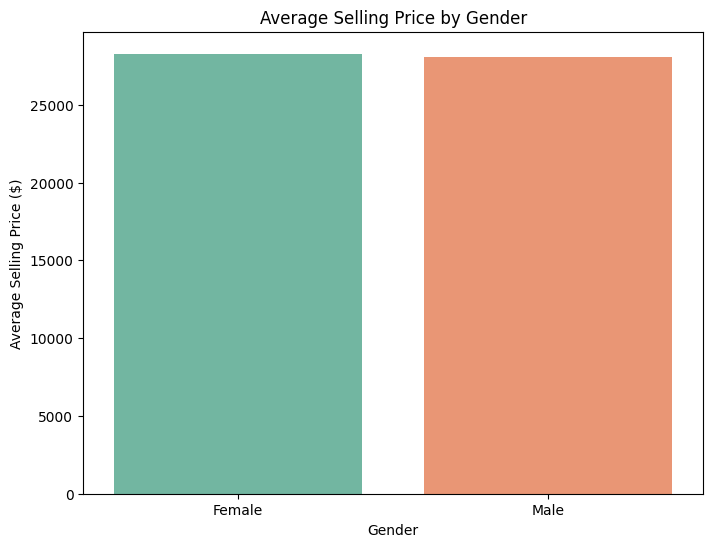

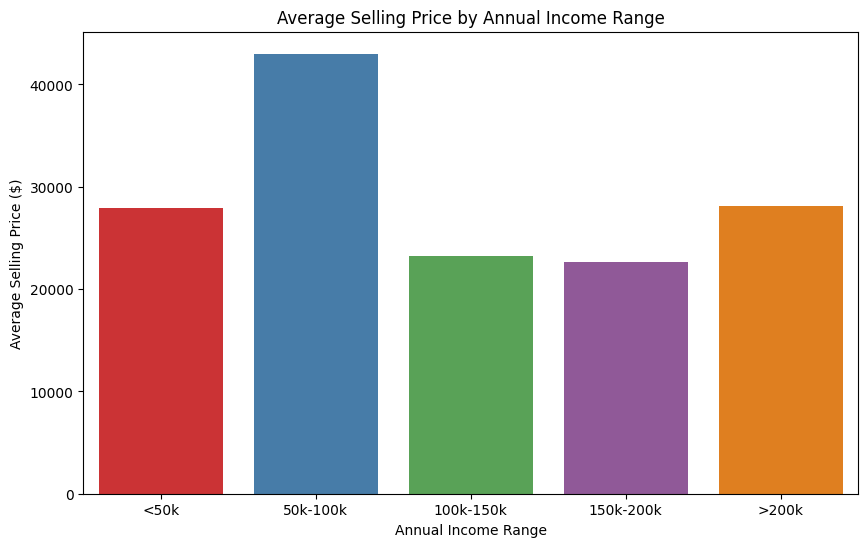

Average Selling Price by Gender and Annual Income Range:
Income Range          <50k  50k-100k     100k-150k     150k-200k         >200k
Gender                                                                        
Female        28132.038732       NaN  33000.500000  19001.000000  28318.788864
Male          27816.302247   43000.0  16666.666667  23055.888889  28106.856206


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_gender = car_data.groupby('Gender')['Price ($)'].mean()

bins = [0, 50000, 100000, 150000, 200000, car_data['Annual Income'].max()]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
car_data['Income Range'] = pd.cut(car_data['Annual Income'], bins=bins, labels=labels)

avg_price_by_income = car_data.groupby('Income Range')['Price ($)'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_gender.index, y=avg_price_by_gender.values, palette="Set2")
plt.title('Average Selling Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price ($)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette="Set1")
plt.title('Average Selling Price by Annual Income Range')
plt.xlabel('Annual Income Range')
plt.ylabel('Average Selling Price ($)')
plt.show()

combined_analysis = car_data.groupby(['Gender', 'Income Range'])['Price ($)'].mean().unstack()

print("Average Selling Price by Gender and Annual Income Range:")
print(combined_analysis)


Answer to Q.No 7:

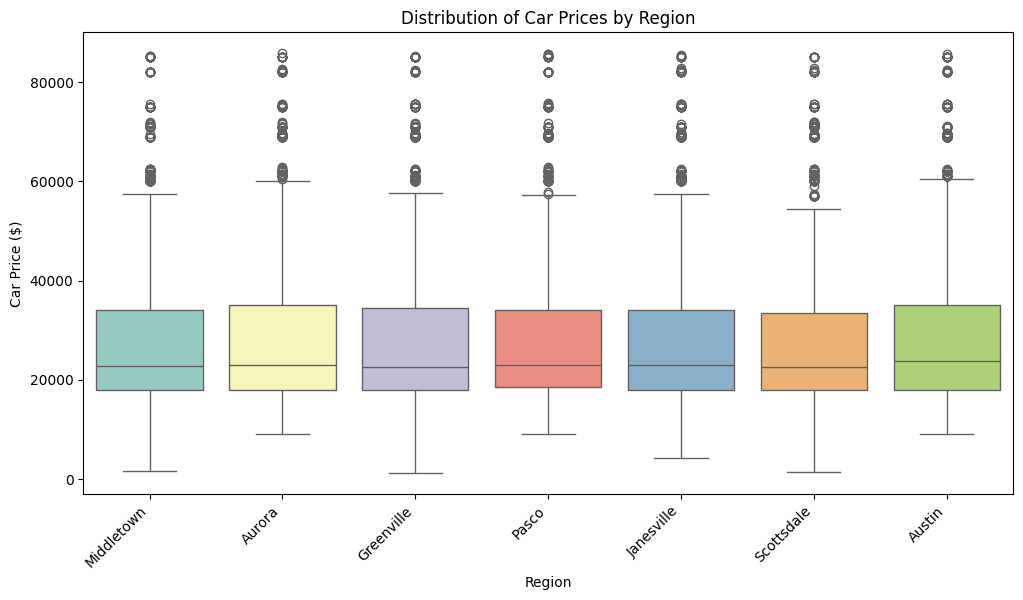

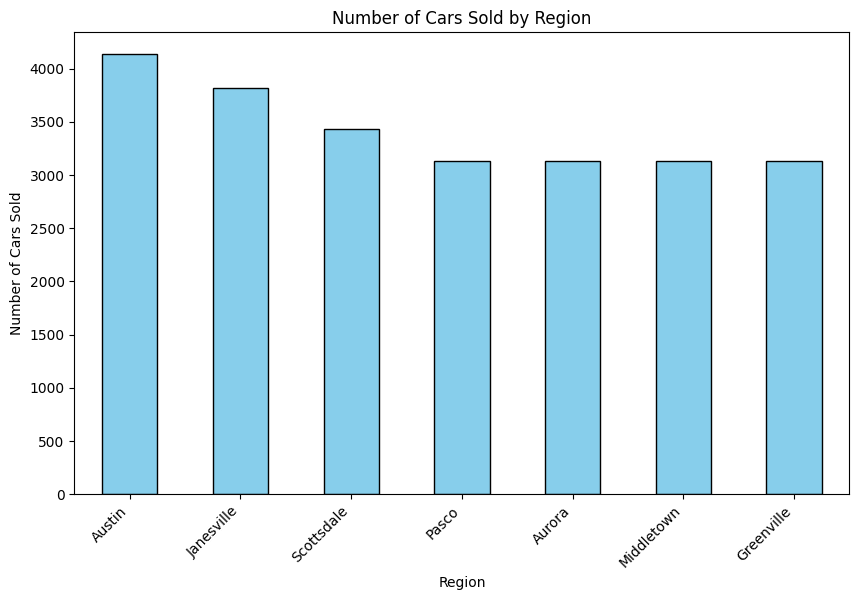

Summary Statistics for Car Prices by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=car_data, x='Dealer_Region', y='Price ($)', palette='Set3')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

cars_sold_by_region = car_data['Dealer_Region'].value_counts()

plt.figure(figsize=(10, 6))
cars_sold_by_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

price_summary_by_region = car_data.groupby('Dealer_Region')['Price ($)'].describe()

print("Summary Statistics for Car Prices by Region:")
print(price_summary_by_region)


Answer to Q.No 8:

Average Car Price by Engine Size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


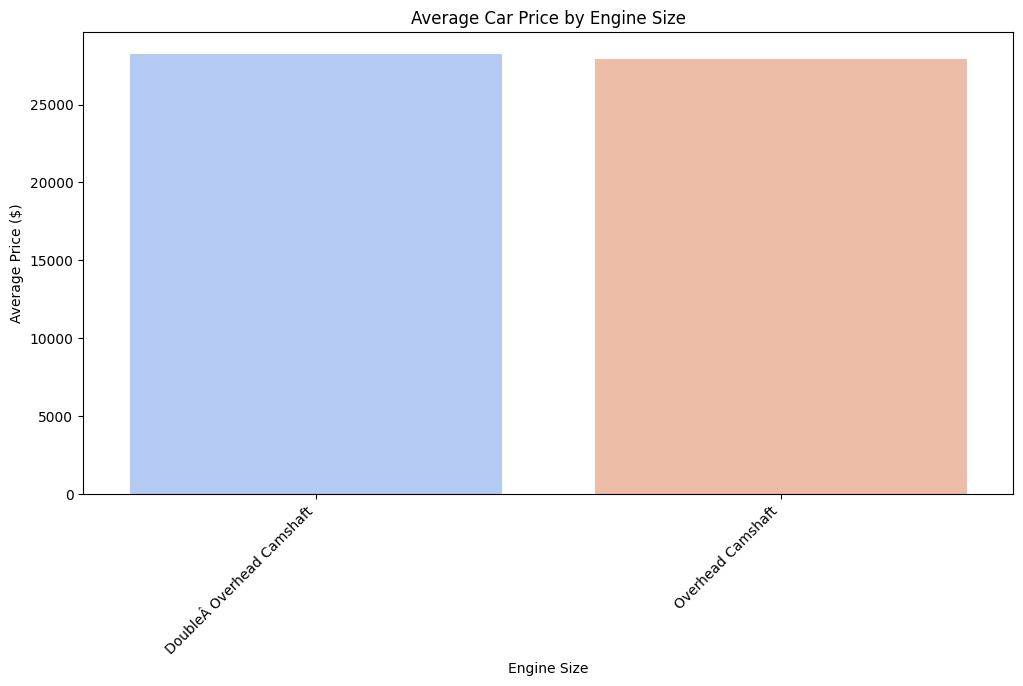

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_engine = car_data.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

print("Average Car Price by Engine Size:")
print(avg_price_by_engine)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette="coolwarm")
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Answer to Q.No 9:

Average Car Price by Customer's Annual Income Bracket:
Income Bracket
<50k         27884.29782
50k-100k     43000.00000
100k-150k    23200.20000
150k-200k    22650.40000
>200k        28152.04346
Name: Price ($), dtype: float64


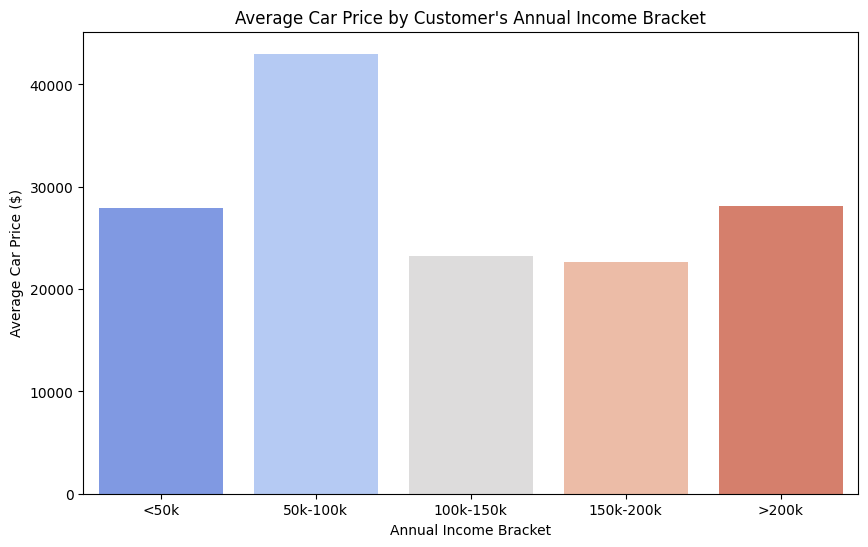

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 50000, 100000, 150000, 200000, car_data['Annual Income'].max()]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
car_data['Income Bracket'] = pd.cut(car_data['Annual Income'], bins=bins, labels=labels)

avg_price_by_income_bracket = car_data.groupby('Income Bracket')['Price ($)'].mean()

print("Average Car Price by Customer's Annual Income Bracket:")
print(avg_price_by_income_bracket)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income_bracket.index, y=avg_price_by_income_bracket.values, palette="coolwarm")
plt.title('Average Car Price by Customer\'s Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.show()


Answer to Q.No 10:

Top 5 Car Models with the Highest Number of Sales:
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


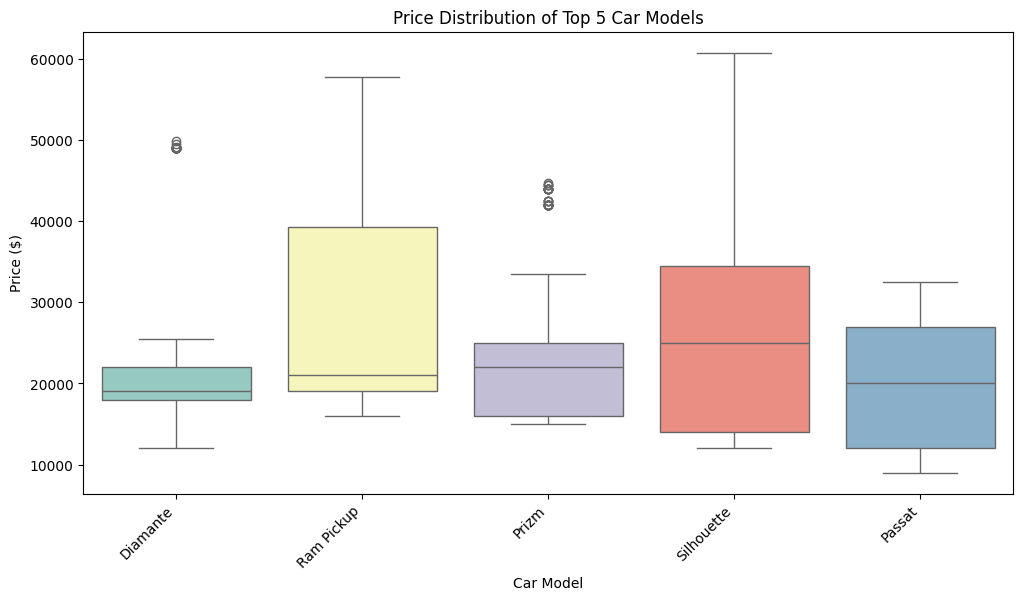

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_models = car_data['Model'].value_counts().head(5)

top_5_data = car_data[car_data['Model'].isin(top_5_models.index)]

print("Top 5 Car Models with the Highest Number of Sales:")
print(top_5_models)

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_data, x='Model', y='Price ($)', palette='Set3')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Answer to Q.No 11:

Average Car Price by Engine Size and Color:
Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
Overhead Camshaft          31732.967164  24327.767694  30153.405229

Price Variation (Standard Deviation) by Car Color:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


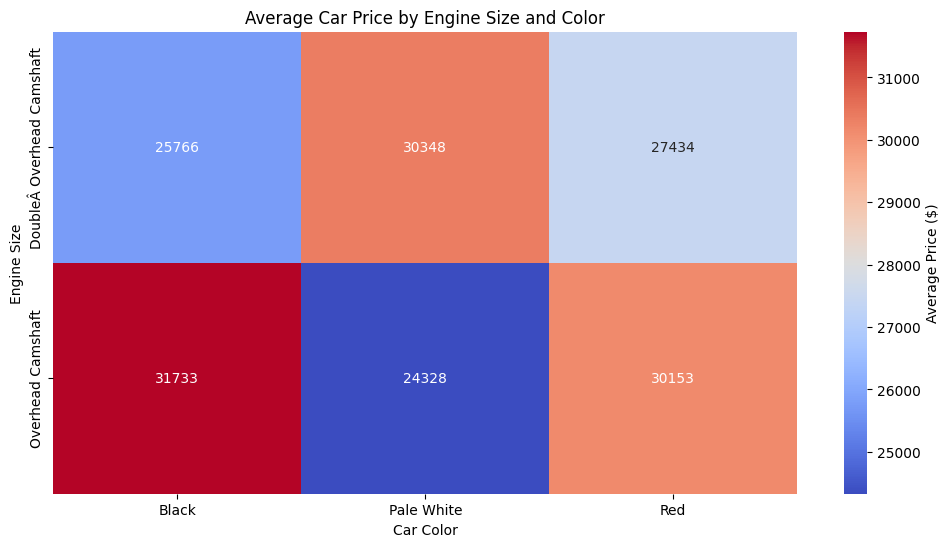

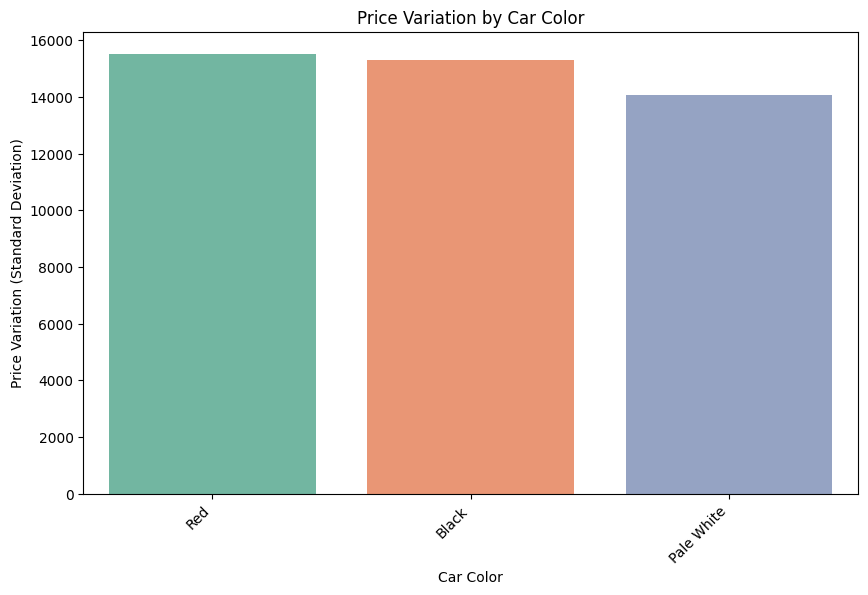

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_engine_color = car_data.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

print("Average Car Price by Engine Size and Color:")
print(avg_price_by_engine_color)

price_variation_by_color = car_data.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

print("\nPrice Variation (Standard Deviation) by Car Color:")
print(price_variation_by_color)

plt.figure(figsize=(12, 6))
sns.heatmap(avg_price_by_engine_color, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Average Price ($)'})
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Car Color')
plt.ylabel('Engine Size')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_variation_by_color.index, y=price_variation_by_color.values, palette='Set2')
plt.title('Price Variation by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=45, ha='right')
plt.show()


Answer to Q.No 12:

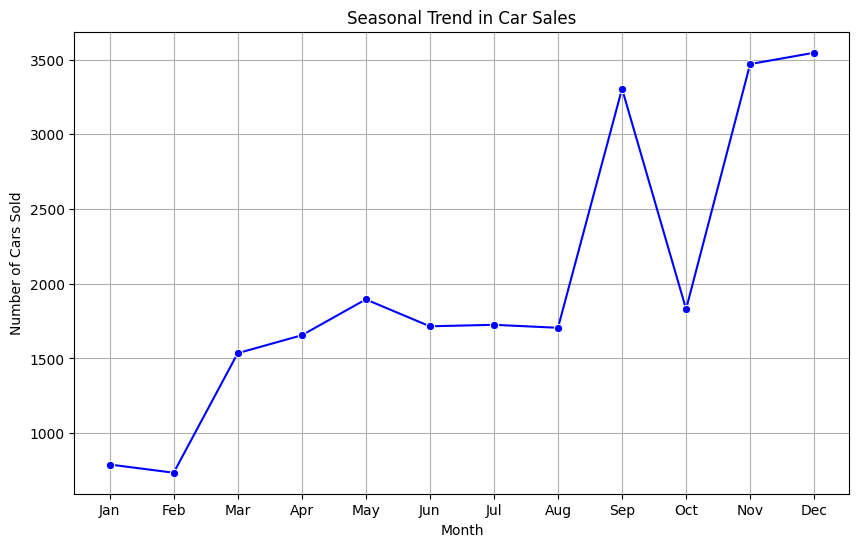

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

car_data['Date'] = pd.to_datetime(car_data['Date'])

car_data['Month'] = car_data['Date'].dt.month

monthly_sales = car_data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='blue')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Answer to Q.No 13:

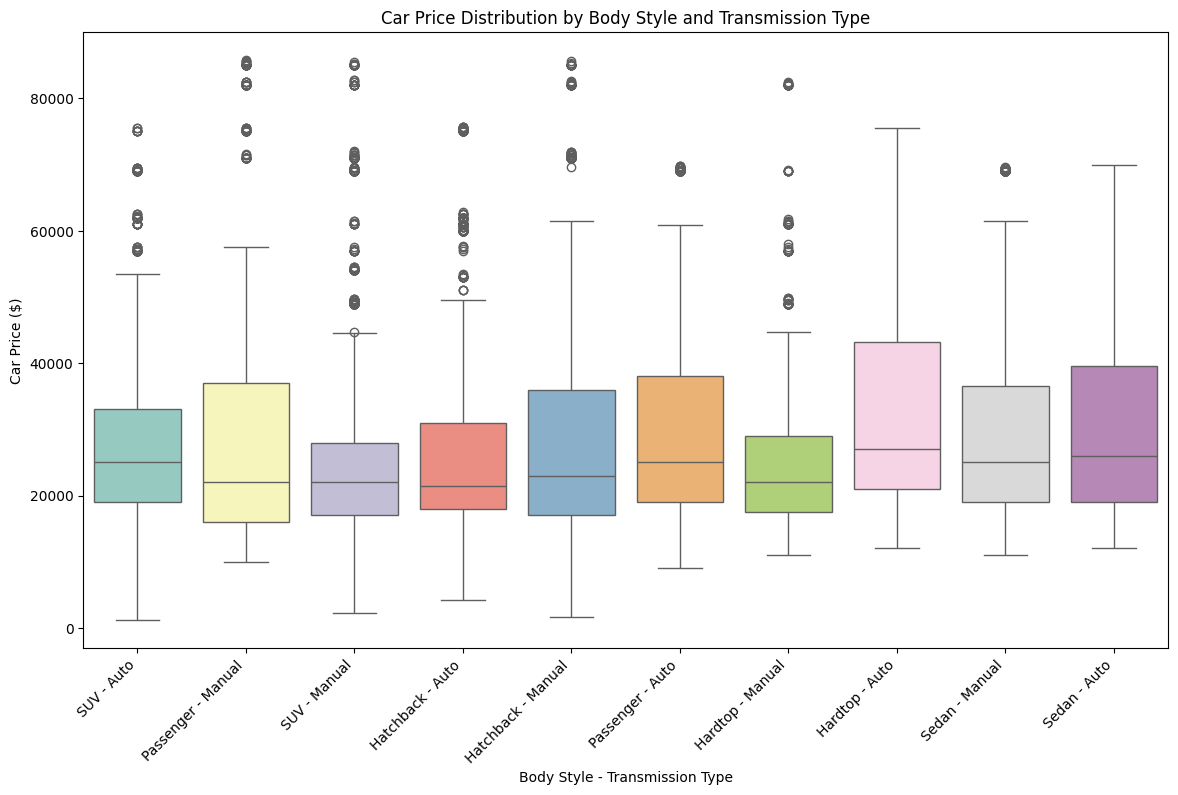

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

car_data['Body_Transmission'] = car_data['Body Style'] + ' - ' + car_data['Transmission']

plt.figure(figsize=(14, 8))
sns.boxplot(data=car_data, x='Body_Transmission', y='Price ($)', palette='Set3')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style - Transmission Type')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Answer to Q.No 14:

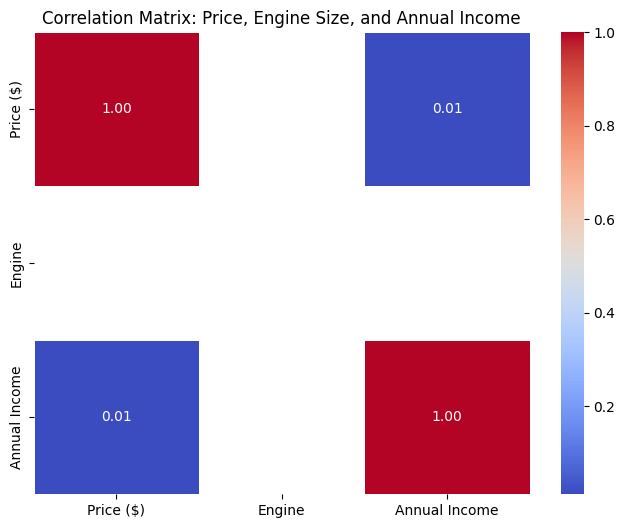

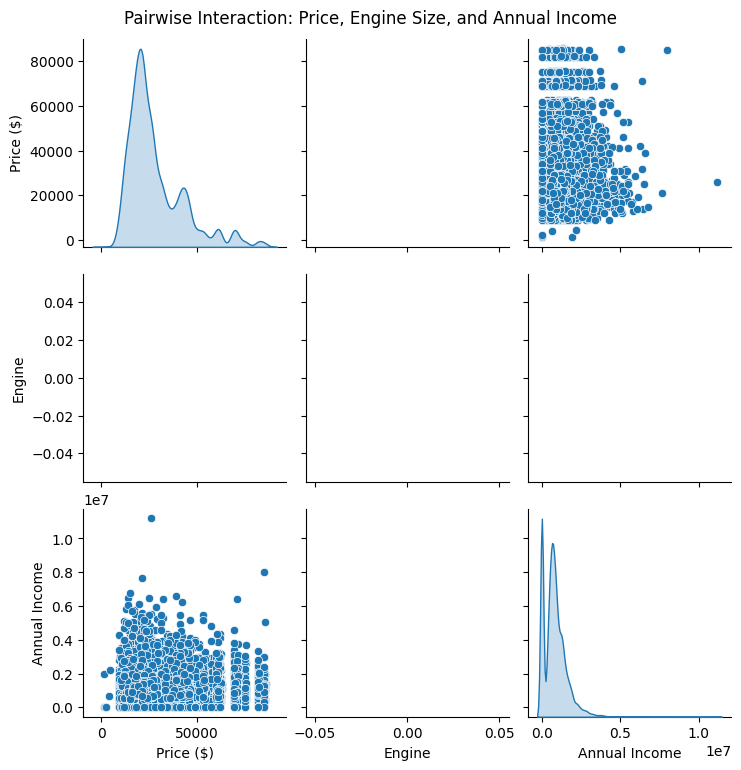

In [ ]:
car_data['Engine'] = car_data['Engine'].str.extract('(\d+\.?\d*)').astype(float)

correlation_data = car_data[['Price ($)', 'Engine', 'Annual Income']]

correlation_matrix = correlation_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Price, Engine Size, and Annual Income')
plt.show()

# Step 5: Pair plot to observe interactions
sns.pairplot(correlation_data, diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Interaction: Price, Engine Size, and Annual Income', y=1.02)
plt.show()


Answer to Q.No 15:

Average Car Price by Model and Engine Type:
        Model                    Engine     Price ($)
0      03-Sep  Double Overhead Camshaft  37986.380117
1      05-Sep  Double Overhead Camshaft  41067.000000
2      05-Sep         Overhead Camshaft  28071.454545
3      3000GT  Double Overhead Camshaft  22764.326923
4      3000GT         Overhead Camshaft  21770.659864
..        ...                       ...           ...
256  Windstar         Overhead Camshaft  17100.272727
257  Wrangler  Double Overhead Camshaft  21145.294737
258  Wrangler         Overhead Camshaft  18742.942029
259    Xterra  Double Overhead Camshaft  15940.459459
260    Xterra         Overhead Camshaft  31072.500000

[261 rows x 3 columns]


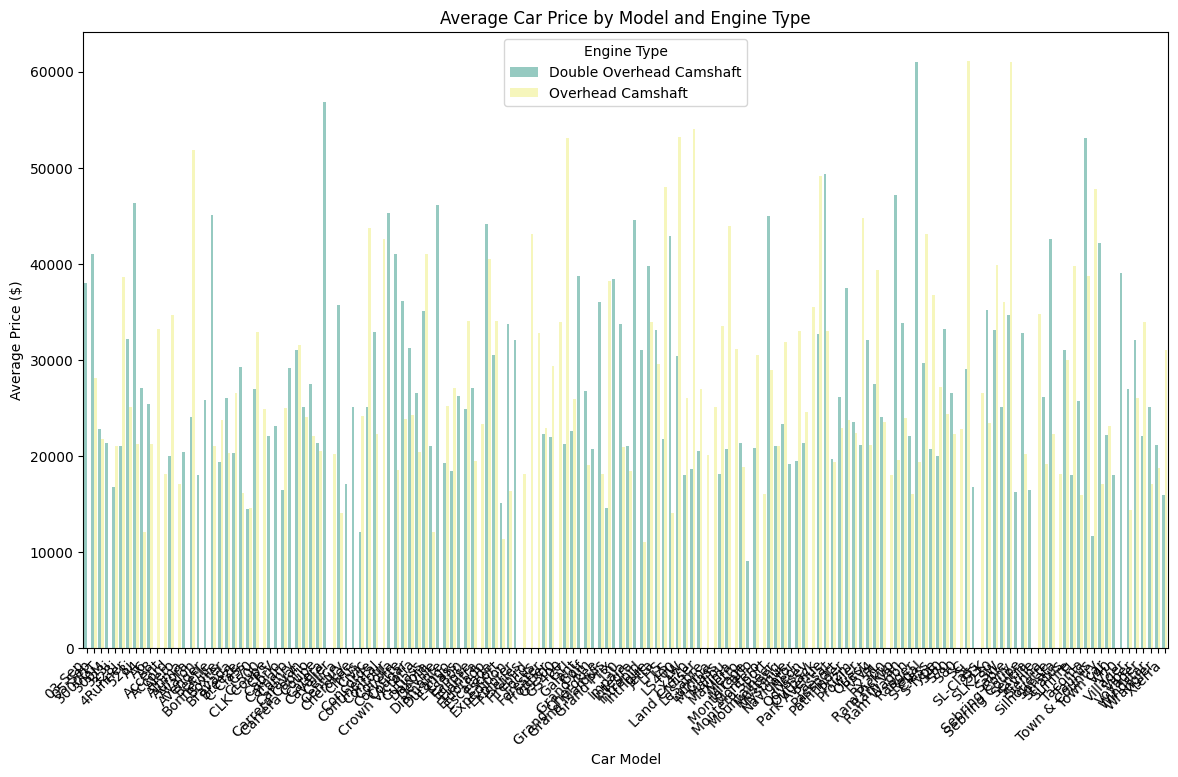

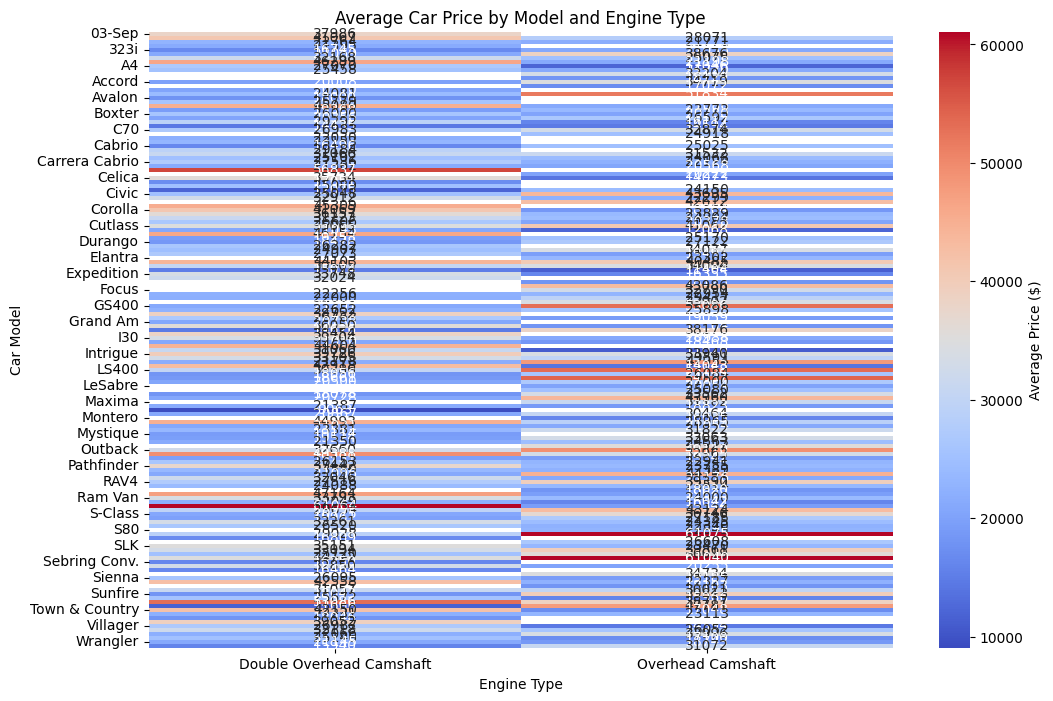

In [ ]:
import pandas as pd

car_data = pd.read_csv('Car Sale.csv')

avg_price_by_model_engine = car_data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

print("Average Car Price by Model and Engine Type:")
print(avg_price_by_model_engine)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_by_model_engine, x='Model', y='Price ($)', hue='Engine', palette='Set3')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

avg_price_heatmap = avg_price_by_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')

plt.figure(figsize=(12, 8))
sns.heatmap(avg_price_heatmap, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Average Price ($)'})
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.show()

EDA 3

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [ ]:


import pandas as pd

file_name = list(uploaded.keys())[0]
amazon_data = pd.read_csv(file_name)
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Answer to Q.No 1:

In [ ]:
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')
average_rating_by_category = amazon_data.groupby('category')['rating'].mean()
average_rating_by_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


Answer to Q.No 2:

In [ ]:
# Import display from IPython
from IPython.display import display

# Display the DataFrame in a more readable format
formatted_output = top_rating_count_by_category[['category', 'product_name', 'rating_count']]

# Add a title and display the table
print("Top Products by Rating Count in Each Category")
display(formatted_output.style.set_properties(**{
    'background-color': '#f9f9f9',
    'border-color': 'black',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'left',
}))


Top Products by Rating Count in Each Category


,category,product_name,rating_count
900,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables,"Lapster USB 3.0 sata Cable for 2.5 inch SSD and HDD , USB 3.0 to SATA III Hard Driver Adapter , sata to USB Cable-(Blue)",817.000000
32,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)",974.000000
743,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|GraphicTablets","Amazon Basics Magic Slate 8.5-inch LCD Writing Tablet with Stylus Pen, for Drawing, Playing, Noting by Kids & Adults, Black",401.000000
653,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads","STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse Pad, Non-Slip Rubber Base, Waterproof Surface, Premium-Textured, Compatible with Laser and Optical Mice(Universe Black)",491.000000
940,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MouseSets","HP 330 Wireless Black Keyboard and Mouse Set with Numeric Keypad, 2.4GHz Wireless Connection and 1600 DPI, USB Receiver, LED Indicators , Black(2V9E6AA)",427.000000
775,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice","Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",23.000000
798,Computers&Accessories|Accessories&Peripherals|LaptopAccessories|CameraPrivacyCovers,"Gizga Essentials Webcam Cover, Privacy Protector Webcam Cover Slide, Compatible with Laptop, Desktop, PC, Smartphone, Protect Your Privacy and Security, Strong Adhesive, Set of 3, Black",255.000000
592,Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Lapdesks,SKE Bed Study Table Portable Wood Multifunction Laptop-Table Lapdesk for Children Bed Foldabe Table Work with Tablet Slot & Cup Holder Brown Black,690.000000
758,Computers&Accessories|Accessories&Peripherals|LaptopAccessories|NotebookComputerStands,STRIFF Laptop Stand Adjustable Laptop Computer Stand Multi-Angle Stand Phone Stand Portable Foldable Laptop Riser Notebook Holder Stand Compatible for 9 to 15.6” Laptops Black(Black),903.000000
1003,Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingKeyboards,"HP GK320 Wired Full Size RGB Backlight Mechanical Gaming Keyboard, 4 LED Indicators, Mechanical Switches, Double Injection Key Caps, and Windows Lock Key(4QN01AA)",408.000000


Answer to Q.No 3:

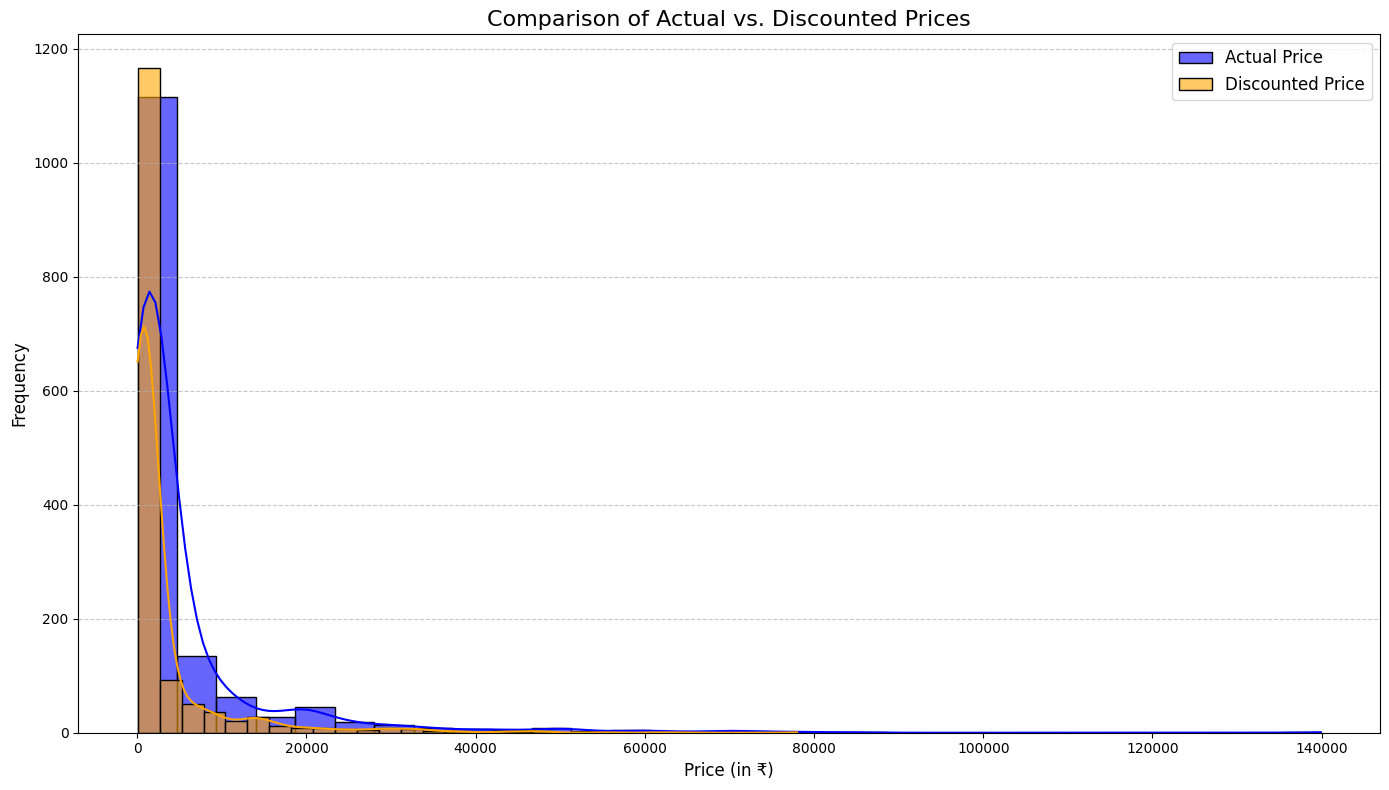

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

sns.histplot(
    amazon_data['actual_price'],
    label='Actual Price',
    kde=True,
    color='blue',
    bins=30,
    alpha=0.6
)

sns.histplot(
    amazon_data['discounted_price'],
    label='Discounted Price',
    kde=True,
    color='orange',
    bins=30,
    alpha=0.6
)

plt.title('Comparison of Actual vs. Discounted Prices', fontsize=16)
plt.xlabel('Price (in ₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Answer to Q.No 4:

<ipython-input-23-d88f25fa2d3d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


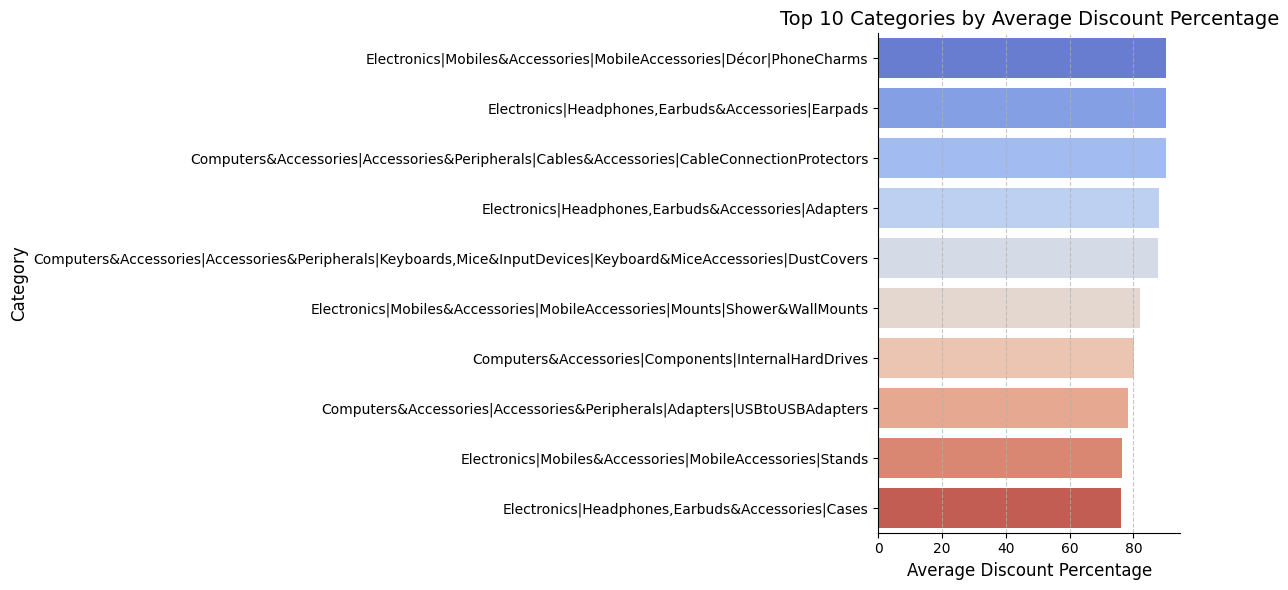

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Change 'df' to 'amazon_data'
average_discount = amazon_data.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    y=average_discount.index,
    x=average_discount.values,
    palette="coolwarm"
)
plt.title('Top 10 Categories by Average Discount Percentage', fontsize=14)
plt.xlabel('Average Discount Percentage', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()
#data was too much, so for convinience, restricted it to top 10 categories

Answer to Q.No 5

In [ ]:
top_products = amazon_data['product_name'].value_counts().head(10)
top_products

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


Answer to Q.No 6:

In [ ]:
product_count_by_category = amazon_data.groupby('category')['product_name'].count()

category_with_most_products = product_count_by_category.idxmax()

print(f"The category with the most products is: {category_with_most_products}")
amazon_data['product_name_lower'] = amazon_data['product_name'].str.lower()
all_keywords = []
for name in amazon_data['product_name_lower']:
    all_keywords.extend(name.split())

keyword_counts = pd.Series(all_keywords).value_counts()

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_keywords = [word for word in keyword_counts.index if word not in stop_words]
keyword_counts = pd.Series(filtered_keywords).value_counts()

print("\nTop 10 Product Keywords:")
print(keyword_counts.head(10))

The category with the most products is: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables

Top 10 Product Keywords:
|                  1
homepack           1
jm                 1
46,                1
canvas             1
(lustre            1
inkulture          1
stainless_steel    1
sapphira           1
liquid/kitchen     1
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Answer to Q.No 7:

In [ ]:
import pandas as pd
top_products = (
    average_rating_by_product.head(10)
    .reset_index()
    .rename(columns={'product_name': 'Product Name', 'rating': 'Average Rating'})
)

print("Top 10 Products with Highest Average Ratings:")
print(top_products.to_markdown(index=False))


Top 10 Products with Highest Average Ratings:
| Product Name                                                                                                                                                                                                                                                                 |   Average Rating |
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------:|
| Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop                                                                                                           |              5   |
| Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/

Answer to Q.No 8:

The correlation between discounted_price and rating is: 0.12


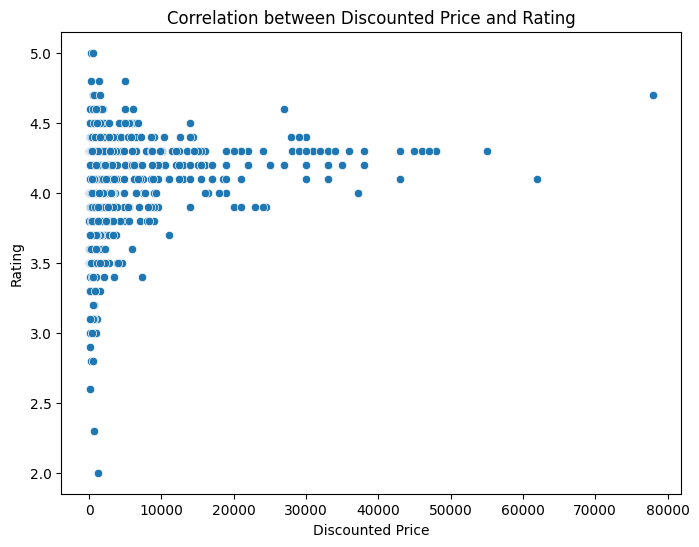

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation = amazon_data['discounted_price'].corr(amazon_data['rating'])

print(f"The correlation between discounted_price and rating is: {correlation:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=amazon_data, x='discounted_price', y='rating')
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

Answer to Q.No 9:

In [ ]:
top_categories = amazon_data.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

print("Top 5 categories based on the highest average rating:")
top_categories

Top 5 categories based on the highest average rating:


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5


Answer to Q.No 10:

Potential Areas for Improvement or Optimization Based on dataset Analysis:

**Discount Strategy Optimization**

Observation: Significant differences between actual and discounted prices across categories. High discount percentages in some categories may not align with customer demand or profitability.
Action: Identify categories with consistently high discounts but low ratings or sales (e.g., rating_count). Consider adjusting the discount strategy to optimize revenue while maintaining customer satisfaction.

**Product Category Performance**

Observation: Certain categories have lower average ratings or fewer rating_count compared to others.
Action:
Evaluate low-performing categories for improvement in product quality or better product descriptions.
Enhance marketing strategies to boost engagement and reviews.

**Focus on Top-Rated Products**

Observation: Some products have significantly higher ratings or review counts, indicating strong customer preference.
Action:
Highlight top-rated products in marketing campaigns.
Analyze what makes these products successful (e.g., quality, pricing, or description) and replicate similar strategies for other products.

**Pricing Strategy**

Observation: The distribution of actual and discounted prices shows potential pricing inconsistencies across categories.
Action:
Review pricing strategies for outliers where actual or discounted prices deviate significantly from the norm.
Optimize pricing based on competitor analysis and customer willingness to pay.

**Customer Engagement Improvement**

Observation: Some products have high ratings but low review counts (rating_count), suggesting low customer engagement despite satisfaction.
Action:
Encourage customers to leave reviews through follow-ups or incentives.
Highlight the benefits of providing feedback to improve product visibility and trust.

**Category-Specific Improvements**

Observation: Certain categories show lower discounts or engagement, potentially due to lower demand or poor product descriptions.
Action:
Improve product descriptions and images for underperforming categories to enhance attractiveness.
Use targeted advertising to boost visibility in these categories.

**Data Quality and Consistency**

Observation: The dataset shows formatting issues in some columns (e.g., currency symbols in actual_price and discounted_price).
Action:
Ensure consistent formatting for numerical columns to avoid errors in future analyses.
Validate the data for missing or incorrect entries to maintain quality.

**Cross-Sell and Upsell Opportunities**

Observation: Some categories or products might have complementary items (e.g., USB cables and electronics).
Action:
Identify opportunities for bundling products to increase the average transaction value.
Create personalized recommendations based on customer purchase behavior.

**Customer-Centric Product Development**

Observation: Categories with high review counts and lower ratings may indicate customer dissatisfaction.
Action:
Analyze feedback in reviews (e.g., review_content) to identify areas of improvement.
Focus on resolving common complaints or adding features based on customer suggestions.

**Leverage Analytics for Strategic Decision-Making**

Observation: Patterns in pricing, ratings, and engagement can provide actionable insights.
Action:
Use predictive models to anticipate demand and optimize inventory.
Implement A/B testing for pricing or marketing campaigns to refine strategies.

Final Note: These improvements require collaboration between product managers, marketers, and data analysts to implement actionable strategies effectively. Regular data audits and advanced analytics techniques (e.g., machine learning models) can further enhance decision-making processes.



EDA 4:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [ ]:
import pandas as pd
spotify_data = pd.read_csv("spotify.csv")
print(spotify_data.head())

  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


In [ ]:
print("\nMissing Values:")
print(spotify_data.isnull().sum())
print("\nDataset Info:")
print(spotify_data.info())

print("\nBasic Statistics:")
print(spotify_data.describe())



Missing Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None

Basic Statistics:
       Popularity  Duration (ms)
count  440.000000     440.000000
mean    75.736364  206810.040909
std      9.886534   53576.930289
min     29.000000   81666.000000
25%     70.000000  172778.500000
50%     77.000000  201866.000000
75%     83.000000  235119.750000
max     97.000000  501648.000000


Answer to Q.No 1:

In [ ]:
import pandas as pd

spotify_data = pd.read_csv("spotify.csv")

print("First few rows of the dataset:")
print(spotify_data.head())

print("\nChecking for null values:")
print(spotify_data.isnull().sum())

if spotify_data.isnull().values.any():
    spotify_data = spotify_data.dropna()
    print("\nNull values dropped. Updated null value count:")
    print(spotify_data.isnull().sum())
else:
    print("\nNo null values found in the dataset.")

print("\nChecking for duplicate rows:")
duplicate_rows = spotify_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    spotify_data = spotify_data.drop_duplicates()
    print("\nDuplicate rows dropped.")
else:
    print("\nNo duplicate rows found in the dataset.")

print("\nShape of the dataset after cleaning:")
print(spotify_data.shape)


First few rows of the dataset:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  

Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

No null values found in the dataset.

Checking for duplicate rows:
Number of duplicate rows: 27

Duplicate rows dropped.

Shape of the dataset after cleaning:
(413, 5)


Answer to Q.No 2:

Using column 'Popularity' instead of 'popularity'


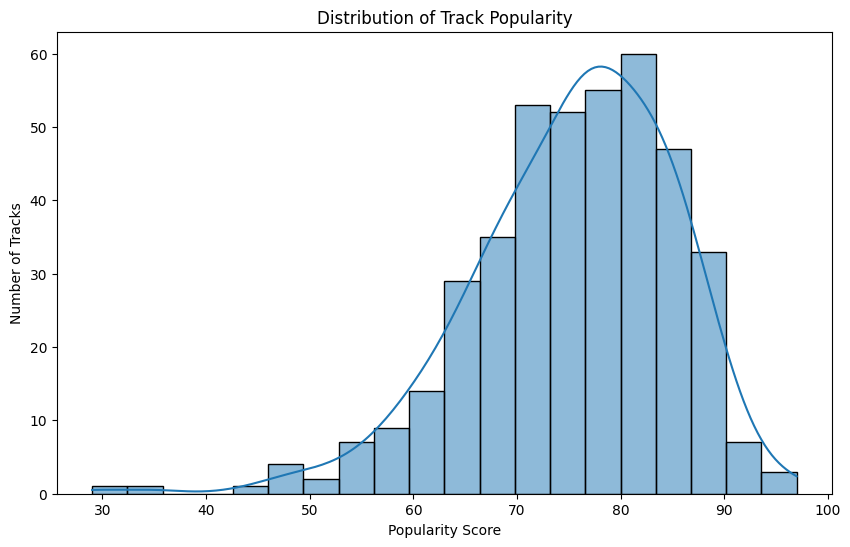

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spotify_data = pd.read_csv("spotify.csv")

if spotify_data.isnull().values.any():
    spotify_data = spotify_data.dropna()
if spotify_data.duplicated().sum() > 0:
    spotify_data = spotify_data.drop_duplicates()

if 'popularity' not in spotify_data.columns:
    popularity_column = next((col for col in spotify_data.columns if col.lower() == 'popularity'), None)
    if popularity_column:
        print(f"Using column '{popularity_column}' instead of 'popularity'")
    else:
        raise KeyError(f"Column 'popularity' or similar not found in the dataset")
else:
    popularity_column = 'popularity'

plt.figure(figsize=(10, 6))
sns.histplot(spotify_data[popularity_column], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.show()

Answer to Q.No 3:

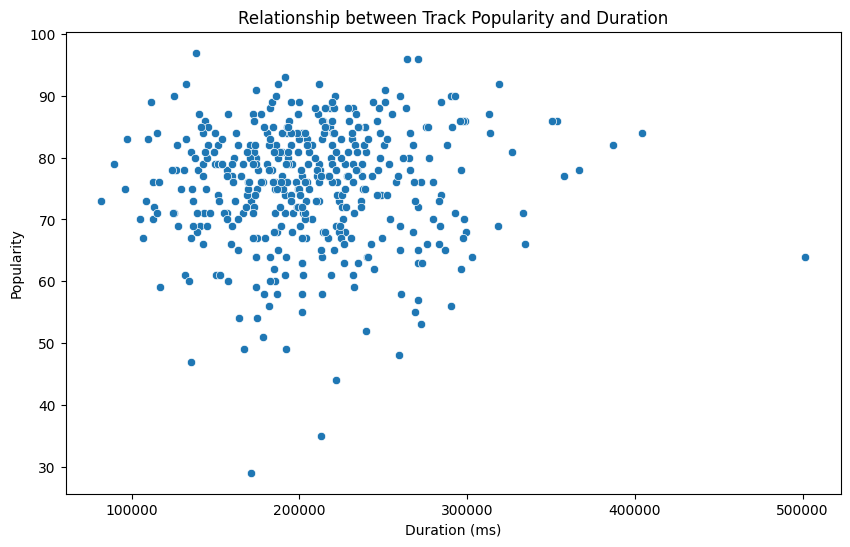

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spotify_data = pd.read_csv("spotify.csv")
if spotify_data.isnull().values.any():
    spotify_data = spotify_data.dropna()
if spotify_data.duplicated().sum() > 0:
    spotify_data = spotify_data.drop_duplicates()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_data)
plt.title('Relationship between Track Popularity and Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

Answer to Q.No 4:

<ipython-input-44-ab08fccaf4a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")


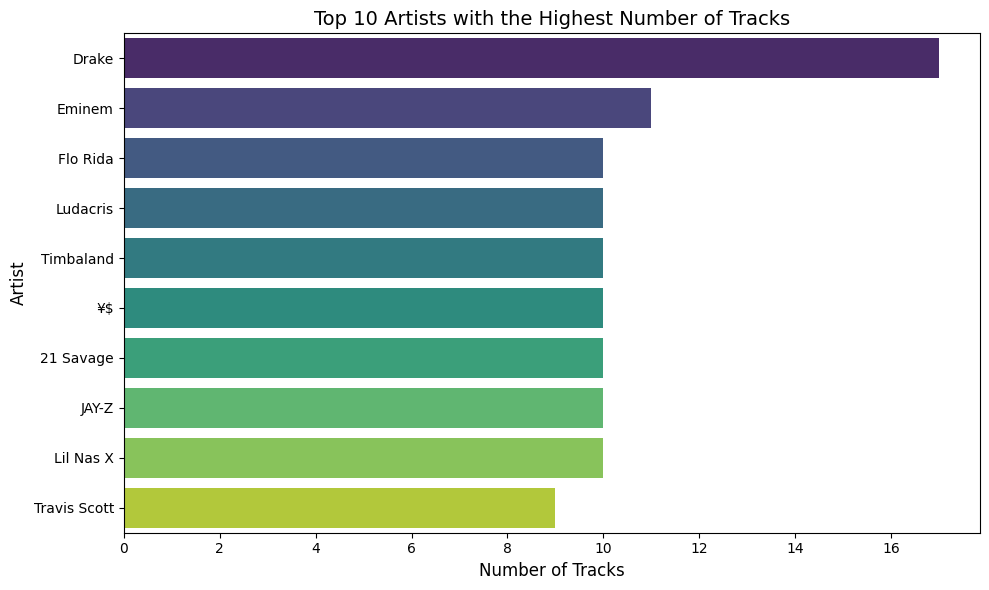

In [ ]:
top_artists = artist_track_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title("Top 10 Artists with the Highest Number of Tracks", fontsize=14)
plt.xlabel("Number of Tracks", fontsize=12)
plt.ylabel("Artist", fontsize=12)
plt.tight_layout()
plt.show()
#for the sake of understanding, only top 10 artists are made to display

Answer to Q.No 5:

In [ ]:
least_popular_tracks = spotify_data.sort_values(by="Popularity").head(5)
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[["Artist", "Track Name", "Popularity"]])


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Answer to Q. No 6:

In [47]:
average_popularity_by_artist = spotify_data.groupby("Artist")["Popularity"].mean().sort_values(ascending=False)

top_5_artists = average_popularity_by_artist.head(5)

print("Top 5 Most Popular Artists (Based on Average Popularity):")
print(top_5_artists)

most_popular_artist = top_5_artists.idxmax()
highest_avg_popularity = top_5_artists.max()

print(f"\nArtist with the highest average popularity: {most_popular_artist} (Average Popularity: {highest_avg_popularity})")


Top 5 Most Popular Artists (Based on Average Popularity):
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

Artist with the highest average popularity: cassö (Average Popularity: 92.0)


Answer to Q.No 7:

In [48]:
average_popularity_by_artist = spotify_data.groupby("Artist")["Popularity"].mean().sort_values(ascending=False)
top_5_artists = average_popularity_by_artist.head(5).index

top_5_artists_data = spotify_data[spotify_data["Artist"].isin(top_5_artists)]

most_popular_tracks = top_5_artists_data.loc[
    top_5_artists_data.groupby("Artist")["Popularity"].idxmax(), ["Artist", "Track Name", "Popularity"]
]

print("Most Popular Tracks for the Top 5 Most Popular Artists:")
print(most_popular_tracks)


Most Popular Tracks for the Top 5 Most Popular Artists:
           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


Answer to Q.No 8:

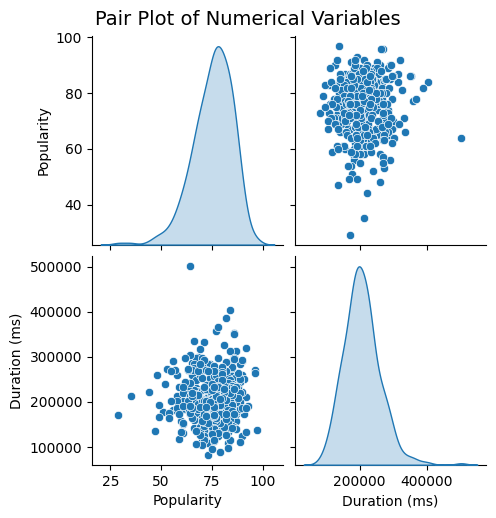

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ["Popularity", "Duration (ms)"]

sns.pairplot(spotify_data[numerical_columns], kind="scatter", diag_kind="kde", height=2.5)

plt.suptitle("Pair Plot of Numerical Variables", y=1.02, fontsize=14)
plt.show()


Answer to Q.No 9:

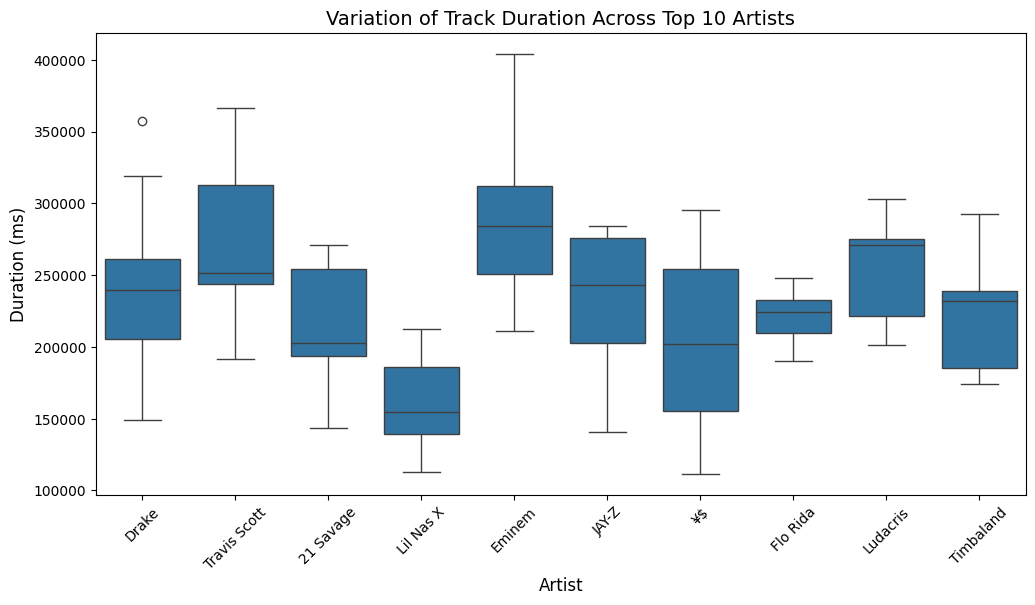

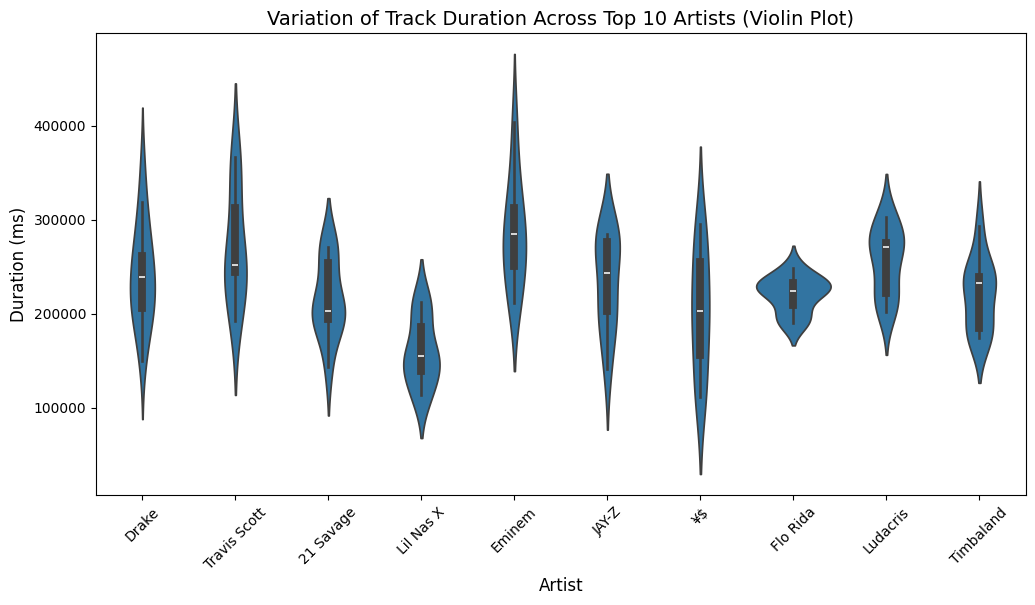

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 10 artists with the most tracks to make the plot readable
top_artists = spotify_data['Artist'].value_counts().head(10).index
filtered_data = spotify_data[spotify_data['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=filtered_data)
plt.title("Variation of Track Duration Across Top 10 Artists", fontsize=14)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Duration (ms)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Duration (ms)", data=filtered_data)
plt.title("Variation of Track Duration Across Top 10 Artists (Violin Plot)", fontsize=14)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Duration (ms)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


**The box plot shows the range and median of track durations for each artist.**

**The violin plot adds information about the distribution and density of durations.**

Answer to Q.No 10:

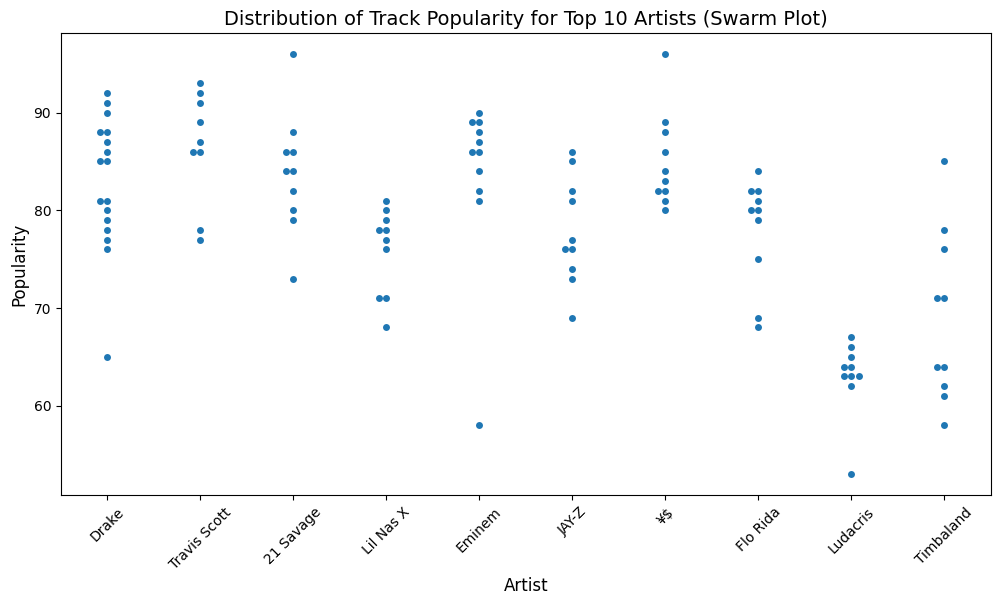

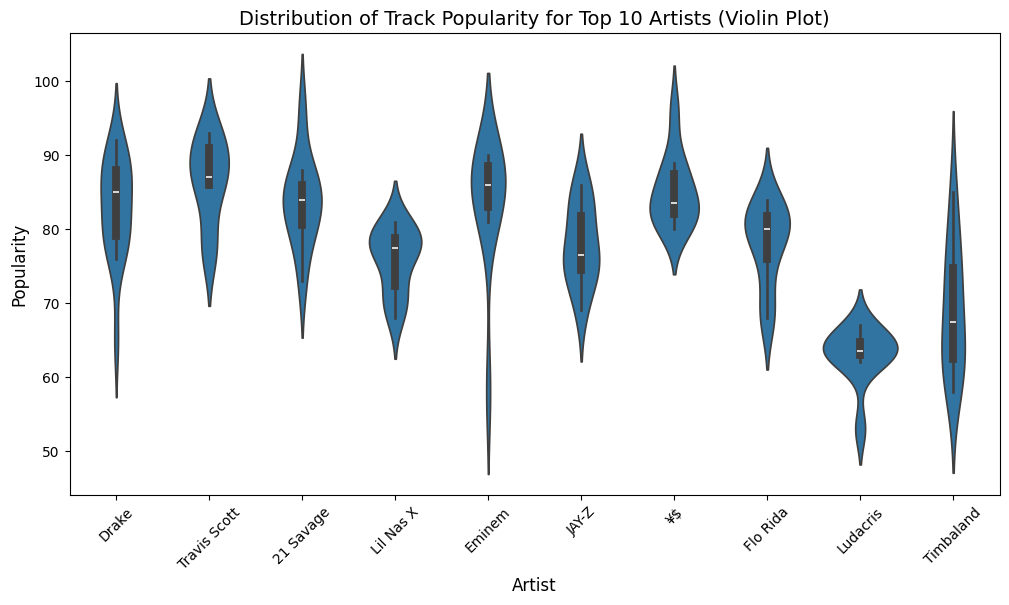

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 10 artists with the most tracks to make the plot readable
top_artists = spotify_data['Artist'].value_counts().head(10).index
filtered_data = spotify_data[spotify_data['Artist'].isin(top_artists)]

#a swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Artist", y="Popularity", data=filtered_data, size=5)
plt.title("Distribution of Track Popularity for Top 10 Artists (Swarm Plot)", fontsize=14)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=filtered_data)
plt.title("Distribution of Track Popularity for Top 10 Artists (Violin Plot)", fontsize=14)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.xticks(rotation=45)
plt.show()



**The swarm plot shows individual track popularity for each artist, which helps identify clusters or gaps.**

**The violin plot gives a more holistic view of the popularity distribution and spread.**